<a href="https://colab.research.google.com/github/Probingbug/foundations-for-ML/blob/main/RMSProp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

loss function

In [2]:
def quadratic_loss(x,y):
  return x**2+10*y**2

gradient of loss function

In [3]:
def quadratic_grad(x,y):
  dx= 2*x
  dy= 20*y

  return np.array([dx,dy])

vanilla gradient descent

In [4]:
def  gradient_descent(grad_func,lr,epochs,start_point):
  x,y= start_point
  path= [(x,y)]
  losses = [quadratic_loss(x,y)]

  for _ in range (epochs):
    grad= grad_func(x,y)
    x-=lr*grad[0]
    y-=lr*grad[1]
    path.append((x,y))
    losses.append(quadratic_loss(x,y))

  return np.array(path),losses

RMSProp

In [5]:
def rmsprop(grad_func, epochs, lr, beta,epsilon,start_point):
    x, y = start_point
    EG2 = np.array([0.0, 0.0])  # Accumulated squared gradients
    path = [(x, y)]             # Ensure it's a list of tuples
    losses = [quadratic_loss(x, y)]

    for _ in range(epochs):
        grad = grad_func(x, y)  # Gradient must be a NumPy array

        EG2 = beta * EG2 + (1 - beta) * (grad ** 2)

        x -= lr * grad[0] / (np.sqrt(EG2[0]) + epsilon)
        y -= lr * grad[1] / (np.sqrt(EG2[1]) + epsilon)

        path.append((x, y))
        losses.append(quadratic_loss(x, y))

    return np.array(path), losses


visualization of paths

In [6]:
def path_plots(function,paths,labels,title):
  X,Y=np.meshgrid(np.linspace(-2,2,400),np.linspace(-2,2,400))
  Z=function(X,Y)

  plt.figure(figsize=(8,6))
  plt.contour(X,Y,Z,levels=50,cmap='jet')

  for path,label in zip(paths,labels):
    plt.plot(path[:,0],path[:,1],label=label)

  plt.scatter(path[0,0],path[0,1],color="green",label= "start")
  plt.scatter(path[-1,0],path[-1,1],color="red",label= "end")

  plt.title(title)
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.show()


visualization of losses

In [7]:
def plot_losses(losses,labels,title):
  plt.figure(figsize=(8,6))

  for loss,label in zip(losses,labels):
    plt.plot(loss,label=label)

  plt.title(title)
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.legend()
  plt.show()


parameters

In [8]:
lr_gd=0.1
lr_rmsprop=0.1
beta=0.9
epsilon=1e-8
epochs=100
start_point=(1.5,1.5)


call the optimization functions

In [9]:
path_gd,losses_gd=gradient_descent(quadratic_grad,lr_gd,epochs,start_point)
path_rmsprop,losses_rmsprop=rmsprop(quadratic_grad,epochs,lr_rmsprop,beta,epsilon,start_point)

plots

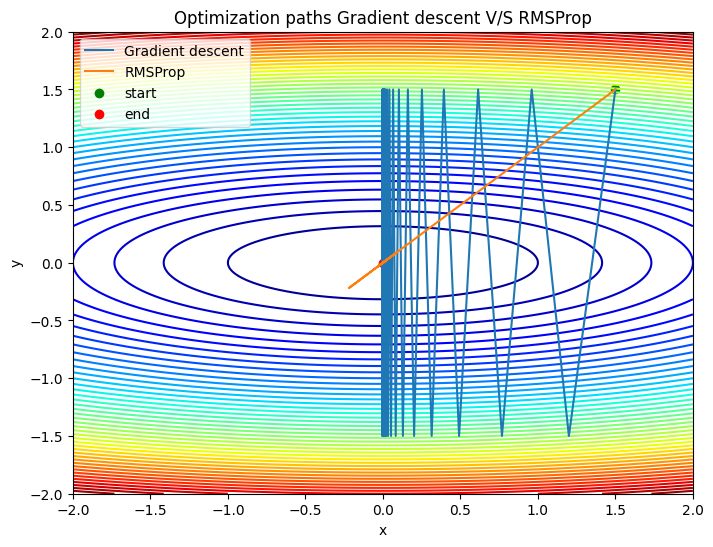

In [10]:
path_plots(quadratic_loss,[path_gd,path_rmsprop],["Gradient descent","RMSProp"],"Optimization paths Gradient descent V/S RMSProp")


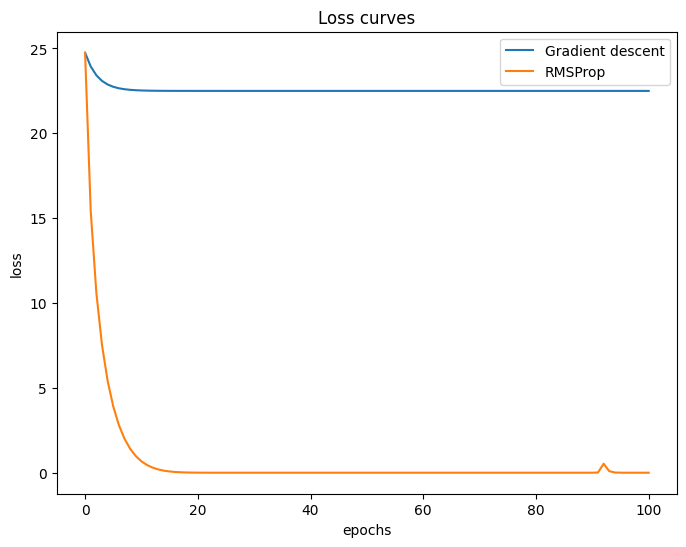

In [11]:
plot_losses([losses_gd, losses_rmsprop], ["Gradient descent", "RMSProp"], "Loss curves")